<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/mariumfaheem666/spam-sms-classification-using-nlp

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/Spam_SMS.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.shape

(5574, 2)

In [5]:
df.duplicated().sum()

415

In [6]:
df[df.duplicated()]

,Class,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5526,spam,You are awarded a SiPix Digital Camera! call 0...
5537,ham,"I know you are thinkin malaria. But relax, chi..."
5541,ham,Just sleeping..and surfing
5555,ham,Hahaha..use your brain dear


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Class'].value_counts()

Class
ham     4518
spam     641
Name: count, dtype: int64

<h2>EDA</h2>

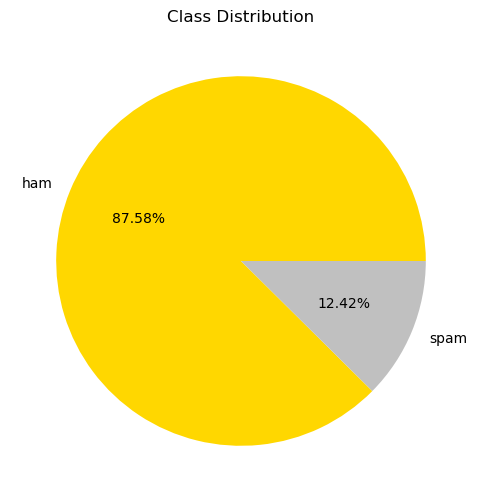

In [9]:
# Plot pie chart for df['Class']
plt.figure(figsize=(8, 6))
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.2f%%', colors=['gold', 'silver'])
plt.title("Class Distribution")
plt.show();

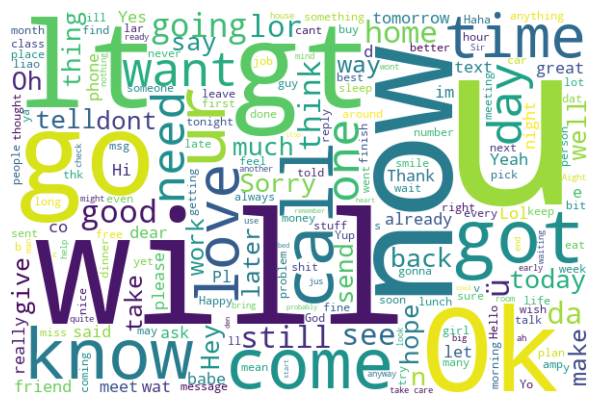

In [10]:
ham_class = df[df['Class'] == 'ham']
ham_class = ' '.join(ham_class['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

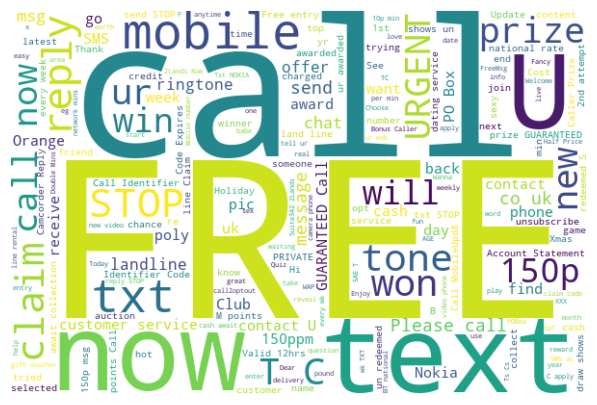

In [11]:
spam_class = df[df['Class'] == 'spam']
spam_class = ' '.join(spam_class['Message'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(spam_class)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

<h2>Data Preprocessing</h2>

In [12]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [13]:
df['Message'][55]

'Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;'

In [14]:
df['Message'][567]

'Oooh bed ridden ey? What are YOU thinking of?'

In [15]:
df['Message'][2137]

'Well done and ! luv ya all'

In [16]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and symbols
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'\b[a-zA-Z]\b', '', text) # Remove single letters
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words
    ]
    
    # Rejoin tokens back --> string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text


df['Message'] = df['Message'].apply(preprocess_text)
df.tail()

,Class,Message
5569,spam,nd time tried contact pound prize claim easy c...
5570,ham,going esplanade fr home
5571,ham,pity mood soany suggestion
5572,ham,guy bitching acted like would interested buyin...
5573,ham,rofl true name


In [17]:
x = df['Message']
y = df['Class']

In [18]:
vectorizer = TfidfVectorizer(min_df=50,max_features=3000)
x =  vectorizer.fit_transform(x).toarray()

In [19]:
# Save the vectorizer
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f) 

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
label_mapping

{0: 'ham', 1: 'spam'}

<h2>Data Splitting</h2>

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<h2>Machine Learning</h2>

In [23]:
MNB_model =MultinomialNB()
MNB_model.fit(X_train, y_train)
print('Training score:',MNB_model.score(X_train, y_train))
print('Testing score:',MNB_model.score(X_test,y_test))

Training score: 0.9561424763750909
Testing score: 0.9544573643410853


In [24]:
y_pred = MNB_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       911
           1       0.87      0.72      0.79       121

    accuracy                           0.95      1032
   macro avg       0.92      0.85      0.88      1032
weighted avg       0.95      0.95      0.95      1032



In [25]:
# Save the_model
with open('MNB_model.pkl', 'wb') as f:
    pickle.dump(MNB_model, f)

<h2>Deep Learning</h2>

In [26]:
tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Message'])
sequences = tokenizer.texts_to_sequences(df['Message'])
padded = pad_sequences(sequences, maxlen=100)

X_train,X_test,y_train,y_test = train_test_split(padded,y,test_size=0.2,random_state=42)

In [27]:
DL_model = Sequential()
DL_model.add(Embedding(input_dim=3000, output_dim=100))
DL_model.add(LSTM(128))
DL_model.add(Dropout(0.3))
DL_model.add(Dense(1, activation='sigmoid'))

DL_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = DL_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 55s 297ms/step - accuracy: 0.8794 - loss: 0.3185 - val_accuracy: 0.9806 - val_loss: 0.0725
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 33s 235ms/step - accuracy: 0.9833 - loss: 0.0508 - val_accuracy: 0.9835 - val_loss: 0.0642
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.9934 - loss: 0.0237 - val_accuracy: 0.9826 - val_loss: 0.0577
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.9954 - loss: 0.0150 - val_accuracy: 0.9845 - val_loss: 0.0673
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 31s 240ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9816 - val_loss: 0.0770
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accuracy: 0.9835 - val_loss: 0.0689
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 226ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9816 - val_loss: 0.0736
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.9993 - loss: 0

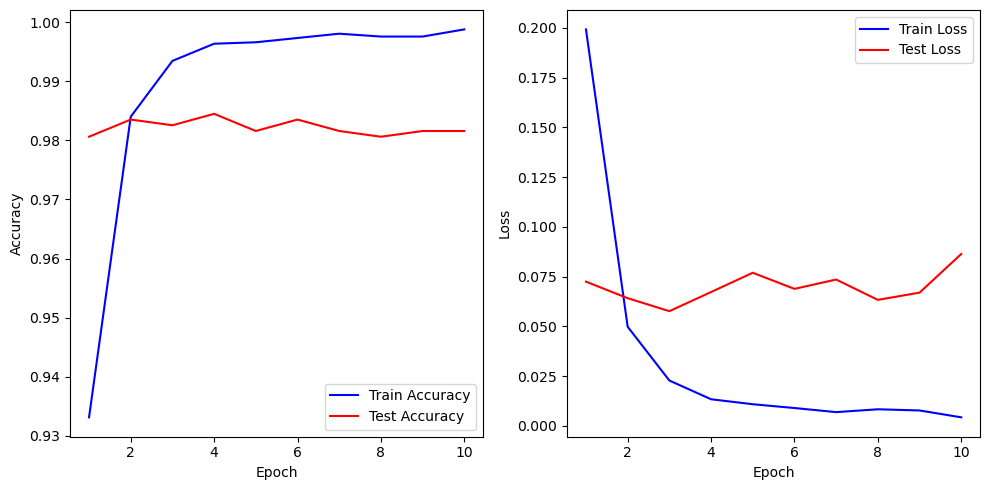

In [28]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [29]:
pred = DL_model.predict(X_test, verbose=0)
y_pred = (pred > 0.5).astype(int)

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       911
           1       0.96      0.88      0.92       121

    accuracy                           0.98      1032
   macro avg       0.97      0.94      0.95      1032
weighted avg       0.98      0.98      0.98      1032



<h2>Machine Learning vs Deep Learning</h2>

In [33]:
# Machine Learning
with open('tfidf.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
with open('MNB_model.pkl', 'rb') as f:
    ML_model = pickle.load(f)

text_input = input('Type Something: ')
print('Prompt: ', text_input)
cleaned_text = preprocess_text(text_input)
vectorized = vectorizer.transform([cleaned_text])
ML_prediction = ML_model.predict(vectorized)
if ML_prediction[0] == 0:
    print("ML Predicted class: ham")
else:
    print("ML Predicted class: spam")
    
#Deep Learning
def DL_predict_text(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100)
    pred = DL_model.predict(pad, verbose=0)
    pred_class = 1 if pred >= 0.5 else 0
    return le.inverse_transform([pred_class])[0]

print("DL Predicted class:", DL_predict_text(text_input))

Type Something:  Congrats! you win a free macbook


Prompt:  Congrats! you win a free macbook
ML Predicted class: spam
DL Predicted class: spam
